# Chemometrics
<br>
**Julien Wist / 2017 / Universidad del Valle**
<br>
**Andrés Bernal / 2017 / ???**

An up-to-date version of this notebook can be found here: https://github.com/jwist/chemometrics/

In [1]:
options(repr.plot.width=4, repr.plot.height=4)

In [2]:
# we load a few packages
library(ggplot2)
library(corrplot)
library(reshape2)
library(caret)
library(MASS) # for LDA
library(klaR) # for pls
library(pls)
library(e1071)# for pls
library(pROC) # for pls
library(vegan)
require(scales)
require(gridExtra);


Attaching package: ‘ggplot2’


The following object is masked from ‘package:crayon’:

    %+%


corrplot 0.84 loaded

Loading required package: lattice



ERROR: Error in library(klaR): there is no package called ‘klaR’


## IRMS

Let's load real data. Assume we want to discriminate coffee beans according to their origin. Therefore we perform Isotope Ratio Mass Spectrometry, which allows to determine the isotopic ration for several nucleus. In this case we will measure only the ratio for carbon in caffeine. 

In [5]:
#rm(list=ls(all=TRUE))

load(url('https://github.com/jwist/chemometrics/raw/master/datasets/coffeeMulti.rda'))
d <- coffeeMulti$irms
dim(d)

[1] 34  6

We have 34 samples and if we look at the country they are from we find out the following:

In [6]:
names(d)

[1] "code"       "country"    "department" "caffeine1"  "caffeine2" 
[6] "mean"

In [7]:
summary(d$country)

Brasil Colombia     Peru 
      11       15        8

We can look to the data in more details. Let's display the first 3 rows (it is always a good idea to look at the data, sometimes there are difficult to diplay because too lengthy. In that case a plot will do the job)

In [8]:
d[1:3,]
# uncomment the following line to run only two classes
#levels(d$country) <- c("otros","Colombia","otros")

,code,country,department,caffeine1,caffeine2,mean
,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
5,1172,Colombia,Tolima,-28.285,-27.936,-28.111
6,1173,Colombia,Tolima,-28.931,-28.800,-28.866
7,1198,Brasil,Otro,-28.056,-28.274,-28.165


We discover that we have two replicates (two columns) and an additional column with means.

Let's make a simple boxplot graph to visualize the data.

In [9]:
d[d$country == "Colombia" | d$country == "Peru",]

,code,country,department,caffeine1,caffeine2,mean
,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
5,1172,Colombia,Tolima,-28.285,-27.936,-28.111
6,1173,Colombia,Tolima,-28.931,-28.800,-28.866
8,1199,Colombia,Huila,-28.154,-28.022,-28.088
10,1201,Colombia,Huila,-28.198,-28.372,-28.285
14,1208,Colombia,Huila,-28.406,-28.505,-28.456
16,1216,Colombia,Huila,-27.722,-27.735,-27.729
18,1240,Colombia,Narino,-28.605,-28.716,-28.661
19,1241,Colombia,Narino,-28.503,-28.163,-28.333
20,1242,Colombia,Narino,-28.835,-29.207,-29.021



	F test to compare two variances

data:  hx and hy
F = 1.1664, num df = 99, denom df = 99, p-value = 0.4451
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7848237 1.7335898
sample estimates:
ratio of variances 
          1.166431 



	F test to compare two variances

data:  hx and hy
F = 1.7297, num df = 99, denom df = 99, p-value = 0.006886
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.163782 2.570668
sample estimates:
ratio of variances 
          1.729653 


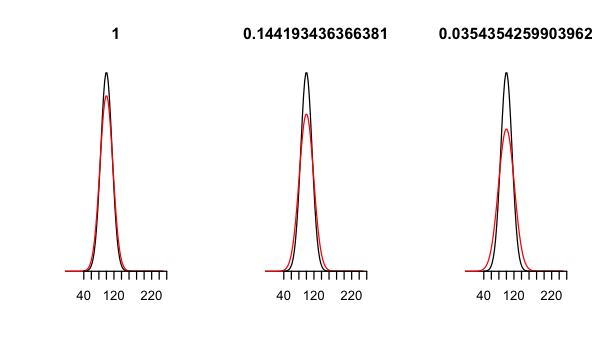

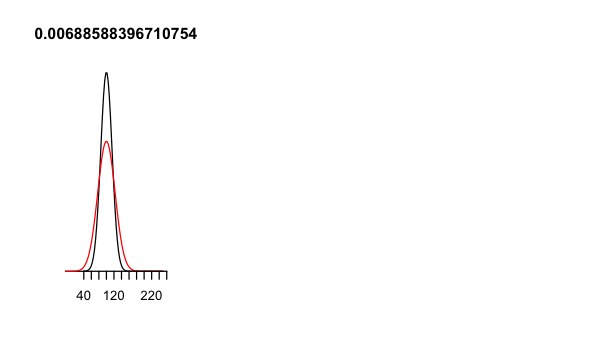

In [19]:
options(repr.plot.width=5, repr.plot.height=3)

mean=100; sd=15
lb=80; ub=120

x <- seq(-10,10,length=100)*sd + mean
hx <- dnorm(x,mean,sd)

hy <- dnorm(x,mean,sd + 2)
s10 <- t.test(hx, hy)$p.value
var.test(hx, hy)

hy <- dnorm(x,mean,sd + 4)
s20 <- var.test(hx, hy)$p.value

hy <- dnorm(x,mean,sd + 6)
s50 <- var.test(hx, hy)$p.value

hy <- dnorm(x,mean,sd + 8)
s100 <- var.test(hx, hy)$p.value

var.test(hx, hy)

par(mfrow=c(1,4))

plot(x, hx, type="n", xlab="", ylab="",
  main=s10, axes=FALSE,xlim=c(0,250))

lines(x, hx)
lines(x, dnorm(x,mean,sd + 2), col="red")
axis(1, at=seq(40, 260, 20), pos=0)

plot(x, hx, type="n", xlab="", ylab="",
  main=s20, axes=FALSE,xlim=c(0,250))

lines(x, hx)
lines(x, dnorm(x,mean,sd + 4), col="red")
axis(1, at=seq(40, 260, 20), pos=0)

plot(x, hx, type="n", xlab="", ylab="",
  main=s50, axes=FALSE,xlim=c(0,250))

lines(x, hx)
lines(x, dnorm(x,mean,sd + 6), col="red")
axis(1, at=seq(40, 260, 20), pos=0)

plot(x, hx, type="n", xlab="", ylab="",
  main=s100, axes=FALSE,xlim=c(0,250))

lines(x, hx)
lines(x, dnorm(x,mean,sd + 8), col="red")
axis(1, at=seq(40, 260, 20), pos=0)

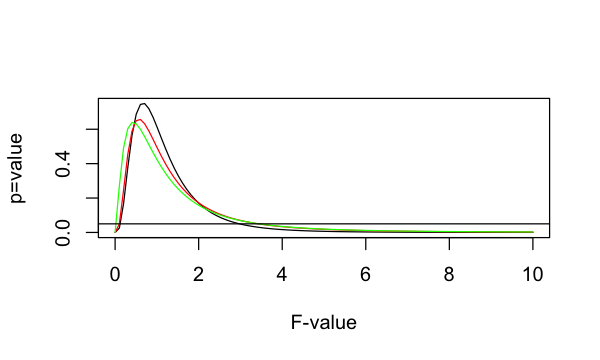

In [23]:
plot(seq(0, 10, length.out = 100), df(seq(0, 10, length.out = 100), 10, 10), type = "l", xlab = "", ylab = "")
lines(seq(0, 10, length.out = 100), df(seq(0, 10, length.out = 100), 10, 5), col = "red")
lines(seq(0, 10, length.out = 100), df(seq(0, 10, length.out = 100), 5, 5), col = "green")
abline(h = 0.05)
title(xlab = "F-value", ylab = "p-value")

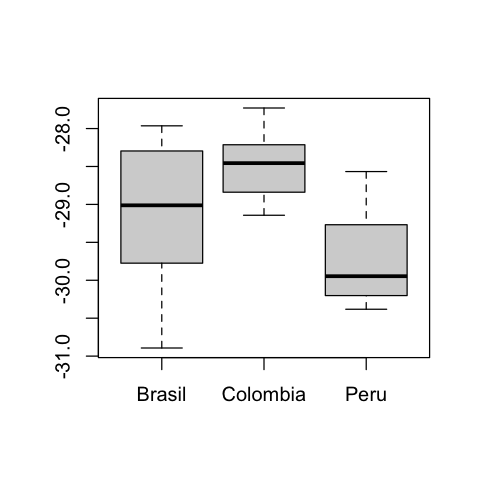

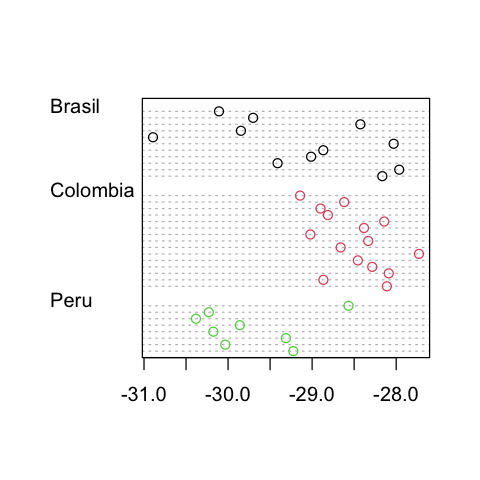

In [57]:
options(repr.plot.width=4, repr.plot.height=4)
boxplot(tapply(d$mean,d$country,function(x) x))
dotchart(d$mean, group = d$country, color = factor(d$country), offset = 0.4)

Or if we prefer we can diplay the density distribution of the data, which gives a similar information as boxplots.

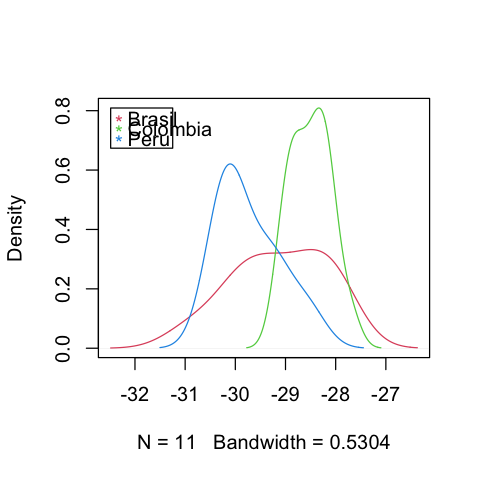

In [25]:
# here we plot the distribution for each class
x <- tapply(d$mean,d$country,function(x) x)
xlims <- range(unlist(tapply(d$mean,d$country,function(x) unlist(range(density(x)$x)))))
ylims <- range(unlist(tapply(d$mean,d$country,function(x) unlist(range(density(x)$y)))))
plot(density(x[1][[1]]),type='l', xlim=xlims, ylim=ylims, col=2, main=" ")
lines(density(x[2][[1]]), col=3)
lines(density(x[3][[1]]), col=4)
legend(min(xlims),max(ylims),levels(d$country), col=2:4, pch="*")

In [43]:
var.test(x$Brasil, x$Colombia)
var.test(x$Brasil, x$Peru)
var.test(x$Peru, x$Colombia)


	F test to compare two variances

data:  x$Brasil and x$Colombia
F = 5.6418, num df = 10, denom df = 14, p-value = 0.003789
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  1.792845 20.030825
sample estimates:
ratio of variances 
          5.641835 



	F test to compare two variances

data:  x$Brasil and x$Peru
F = 2.2958, num df = 10, denom df = 7, p-value = 0.2824
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.4822017 9.0680787
sample estimates:
ratio of variances 
          2.295818 



	F test to compare two variances

data:  x$Peru and x$Colombia
F = 2.4574, num df = 7, denom df = 14, p-value = 0.1443
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  0.7270675 11.2946238
sample estimates:
ratio of variances 
          2.457439 


In [60]:
var.test(d$mean, x$Colombia)
var.test(d$mean, x$Brasil)
var.test(d$mean, x$Peru)


	F test to compare two variances

data:  d$mean and x$Colombia
F = 4.1761, num df = 33, denom df = 14, p-value = 0.006405
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 1.540185 9.570927
sample estimates:
ratio of variances 
          4.176116 



	F test to compare two variances

data:  d$mean and x$Brasil
F = 0.74021, num df = 33, denom df = 10, p-value = 0.4914
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2249219 1.8252337
sample estimates:
ratio of variances 
         0.7402053 



	F test to compare two variances

data:  d$mean and x$Peru
F = 1.6994, num df = 33, denom df = 7, p-value = 0.4792
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3912874 4.5899295
sample estimates:
ratio of variances 
          1.699377 


In [62]:
var.test(c(x$Brasil, x$Peru), x$Colombia)
var.test(x$Brasil, c(x$Peru, x$Colombia))
var.test(x$Peru, c(x$Brasil, x$Colombia))


	F test to compare two variances

data:  c(x$Brasil, x$Peru) and x$Colombia
F = 4.6536, num df = 18, denom df = 14, p-value = 0.005498
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
  1.616121 12.548094
sample estimates:
ratio of variances 
          4.653594 



	F test to compare two variances

data:  x$Brasil and c(x$Peru, x$Colombia)
F = 1.5612, num df = 10, denom df = 22, p-value = 0.368
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.5782801 5.2921306
sample estimates:
ratio of variances 
          1.561248 



	F test to compare two variances

data:  x$Peru and c(x$Brasil, x$Colombia)
F = 0.71508, num df = 7, denom df = 25, p-value = 0.68
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.2511008 3.1496210
sample estimates:
ratio of variances 
         0.7150837 


In [39]:
# then we start the calculations
means <- tapply(d$mean,d$country,mean)      # means
vars <- tapply(d$mean,d$country,var)        # variances
sds <- sqrt(vars)                           # standard deviation
ns <- tapply(d$mean,d$country,length)
# we perform a multiple t-test, that is we calculate t-test between
# all the pairs of countries, and compute the p-values
# from http://www.chem.utoronto.ca/coursenotes/analsci/stats/ttest.html
t <- dist(means) / sqrt( abs(combn(sds^2/ns,2,sum)) )
dof <- abs(combn(sds^2/ns,2,sum))^2 / combn(sds^4/(ns^2*(ns - 1)),2,sum)
#dof <- sum(ns) - length(levels(d$country)) # sometimes the d.o.f are also computed in that simpler manner
p <- 2*pt(-abs(t),df=dof);

In [40]:
t # value of t
dof # degree of freedom
p # p-value associated to t 
  # (probability of finding t if null hypothesis is true) 
  # should be small!

           Brasil Colombia
Colombia 2.052607         
Peru     1.634253 4.976158

[1] 12.61633 16.90348 10.12954

               Brasil     Colombia
Colombia 0.0614565181             
Peru     0.1206906508 0.0005354635

Let's make a simple t-test between Brazil and Colombia.

In [14]:
t.test(d$mean[d$country=="Brasil"], d$mean[d$country=="Colombia"])


	Welch Two Sample t-test

data:  d$mean[d$country == "Brasil"] and d$mean[d$country == "Colombia"]
t = -2.0526, df = 12.616, p-value = 0.06146
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.28761786  0.03492695
sample estimates:
mean of x mean of y 
-29.12955 -28.50320 


In [15]:
t.test(d$mean[d$country=="Peru"], d$mean[d$country=="Colombia"])


	Welch Two Sample t-test

data:  d$mean[d$country == "Peru"] and d$mean[d$country == "Colombia"]
t = -4.9762, df = 10.13, p-value = 0.0005355
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.7646741 -0.6744259
sample estimates:
mean of x mean of y 
-29.72275 -28.50320 


In [70]:
t.test(d$mean[d$country=="Peru"], d$mean[d$country=="Brasil"])


	Welch Two Sample t-test

data:  d$mean[d$country == "Peru"] and d$mean[d$country == "Brasil"]
t = -1.6343, df = 16.903, p-value = 0.1207
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.3593632  0.1729541
sample estimates:
mean of x mean of y 
-29.72275 -29.12955 


In [66]:
t.test(c(d$mean[d$country=="Brasil"], d$mean[d$country=="Peru"]), d$mean[d$country=="Colombia"])


	Welch Two Sample t-test

data:  c(d$mean[d$country == "Brasil"], d$mean[d$country == "Peru"]) and d$mean[d$country == "Colombia"]
t = -3.9157, df = 26.599, p-value = 0.0005643
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.3355258 -0.4167058
sample estimates:
mean of x mean of y 
-29.37932 -28.50320 


In [71]:
t.test(c(d$mean[d$country=="Brasil"], d$mean[d$country=="Colombia"]), d$mean[d$country=="Peru"])


	Welch Two Sample t-test

data:  c(d$mean[d$country == "Brasil"], d$mean[d$country == "Colombia"]) and d$mean[d$country == "Peru"]
t = 3.5928, df = 13.614, p-value = 0.003062
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.3832018 1.5259136
sample estimates:
mean of x mean of y 
-28.76819 -29.72275 


In [72]:
t.test(c(d$mean[d$country=="Colombia"], d$mean[d$country=="Peru"]), d$mean[d$country=="Brasil"])


	Welch Two Sample t-test

data:  c(d$mean[d$country == "Colombia"], d$mean[d$country == "Peru"]) and d$mean[d$country == "Brasil"]
t = 0.61615, df = 16.367, p-value = 0.5463
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4921108  0.8964191
sample estimates:
mean of x mean of y 
-28.92739 -29.12955 


In [74]:
p.adjust(c(0.0614565181, 0.1206906508, 0.0005354635), "bonferroni")
p.adjust(c(0.0614565181, 0.1206906508, 0.0005354635, 0.00056), "bonferroni")
p.adjust(c(0.0614565181, 0.1206906508, 0.0005354635, 0.00056, 0.003062), "bonferroni")

[1] 0.18436955 0.36207195 0.00160639

[1] 0.245826072 0.482762603 0.002141854 0.002240000

[1] 0.307282591 0.603453254 0.002677317 0.002800000 0.015310000

In [18]:

# this complex caluclation can be replaced by this single line
m <- t.test(d$mean[d$country=="Colombia"],d$mean[d$country=="Brasil"])
m2 <- t.test(d$mean[d$country=="Colombia"],d$mean[d$country=="Peru"])
m3 <- t.test(d$mean[d$country=="Brasil"],d$mean[d$country=="Peru"])


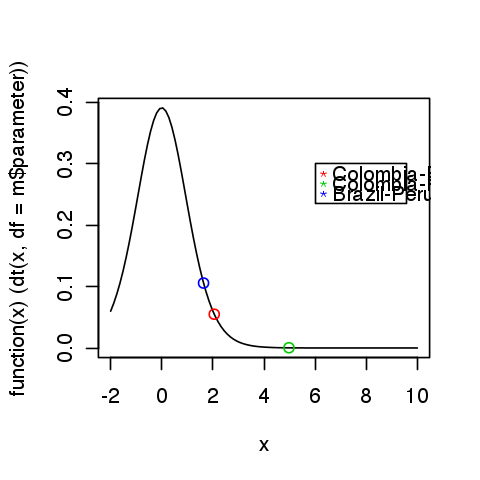

In [19]:
plot(function(x)(dt(x,df=m$parameter)),xlim=c(-2,10)); points(m$statistic,dt(m$statistic,df=m$parameter), col=2, xlab=("d"))
points(m2$statistic,dt(m2$statistic,df=m2$parameter), col=3)
points(m3$statistic,dt(m3$statistic,df=m3$parameter), col=4)
legend(6,0.3,c("Colombia-Brazil", "Colombia-Peru", "Brazil-Peru"), col=2:4, pch="*")


### Conclusion
- we cannot discriminate coffees from those 3 countries based on IRMS data

But

 - multiple t-test is not well suited because the 5% error is multiplicative this means that for 3 tests with 5% error each, the global error is approx 15% 
 - Moreover, t-test assumes 1) homogeneity of variance, 2) normal distributions within all groups and 3) independant variables.

In [49]:
#ANOVA fixes the first two issues. For non-normal distribution use Kruskal-W
#allis test. In this case the test reject the null hypothesis meaning that t
#he populations are NOT identical. 
# annova is best suited for that purpose
fit <- aov(mean ~ country, data=d)
summary(fit)

            Df Sum Sq Mean Sq F value   Pr(>F)    
country      2  8.064   4.032   8.879 0.000894 ***
Residuals   31 14.077   0.454                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [50]:
fit

Call:
   aov(formula = mean ~ country, data = d)

Terms:
                  country Residuals
Sum of Squares   8.063931 14.077413
Deg. of Freedom         2        31

Residual standard error: 0.6738769
Estimated effects may be unbalanced

In [21]:
# F-value is Mean Sq Residuals / Mean Sq country
pf(8.879,2,31,lower.tail = FALSE)
# the p-value is small indicating that the distribution's difference is
# significant


[1] 0.0008941185

In [51]:
# Kruskal-Wallis test is in principle suited for comparison of population that
# are different in size. Small p-values indicates that the null hypothesis is
# safely rejected: populations are too far apart and cannot be explained by randomness.
fit2 <- kruskal.test(mean ~ country, data=d)
fit2


	Kruskal-Wallis rank sum test

data:  mean by country
Kruskal-Wallis chi-squared = 11.506, df = 2, p-value = 0.003174


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = mean ~ country, data = d)

$country
                      diff         lwr        upr     p adj
Colombia-Brasil  0.6263455 -0.03202482  1.2847157 0.0647679
Peru-Brasil     -0.5932045 -1.36386128  0.1774522 0.1571996
Peru-Colombia   -1.2195500 -1.94565397 -0.4934460 0.0007170


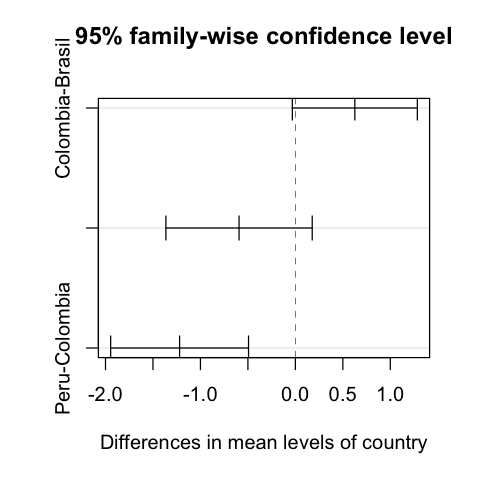

In [75]:
# since data exhibits significance... fortunately,
# post hoc test can be performed to understand how well pairwise populations
# can be separated
#TukeyHSD(fit, "country", ordered = TRUE);
TukeyHSD(fit, "country")
plot(TukeyHSD(fit, "country"))

### conclusion

- Peru is different from  Colombia
- Colombia cannot be distinguished from Brazil
- Peru and Brazil cannot be distinguished
